<a href="https://colab.research.google.com/github/akshi-saxena/heart-disease-prediction/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

**Problem Statement**: Predict if someone has heart disease or not based on their medical attributes.

**Data**: Formatted UCI Heart Disease dataset (https://archive.ics.uci.edu/ml/datasets/heart+Disease) from Kaggle (https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)

The following are the **features** to predict the target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality - can range from mild symptoms to severe problems, signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy - Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
  * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note**: No personal identifiable information (PPI) can be found in the dataset.

If 95% accuracy achieved, then pursue.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

np.random.seed(42)

## Data Analysis

1. What ques are you trying to solve?
2. What kind of data and how to treat each kind?
3. What is missing and how to deal with it?
4. Are there any outliers and should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks (1)/data/'
data = pd.read_csv(path + 'heart-disease.csv')

data.shape

(303, 14)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


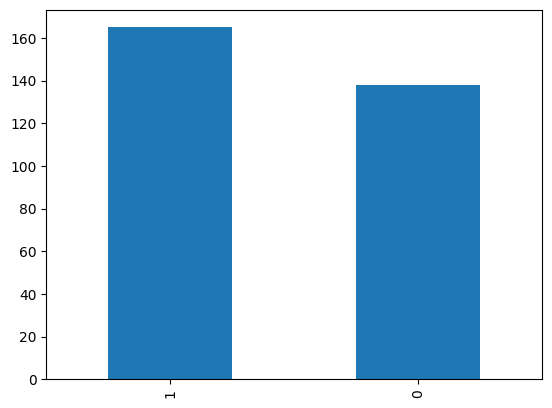

In [ ]:
data.target.value_counts().plot(kind='bar');

There is no class imbalance

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing data

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Based on this data**

If participant is a women, she has 75% chance of heart disease.
If participant is male, he has about 60% chance of heart disease.

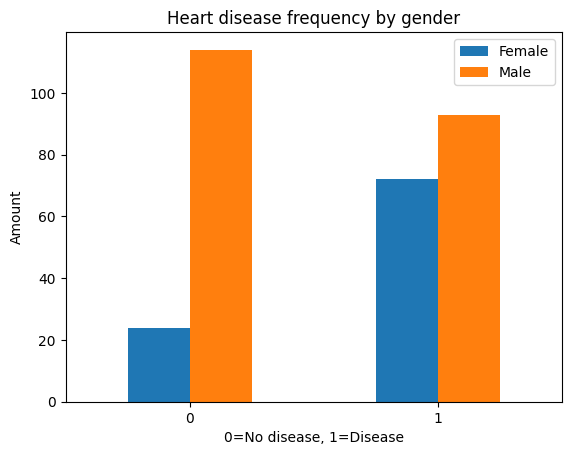

In [ ]:
pd.crosstab(data.target, data.sex).plot(kind='bar')
plt.title('Heart disease frequency by gender')
plt.xlabel('0=No disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(data.target, data.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


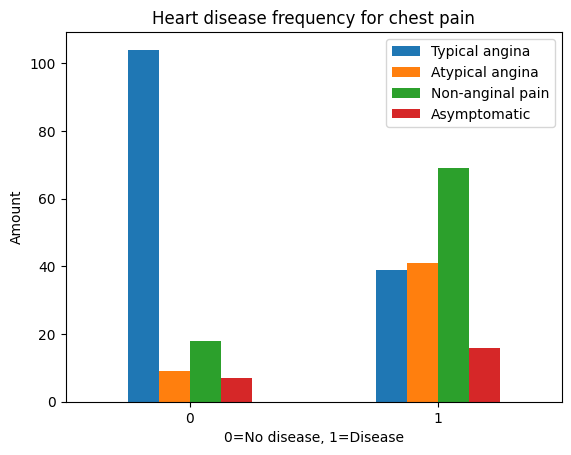

In [ ]:
pd.crosstab(data.target, data.cp).plot(kind='bar')
plt.title('Heart disease frequency for chest pain')
plt.xlabel('0=No disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.xticks(rotation=0);

Interesting to see participants with non heart related pain (non anginal) have a higher chance of heart disease. Even with participants having typical angina, there is lesser chance of heart disease.

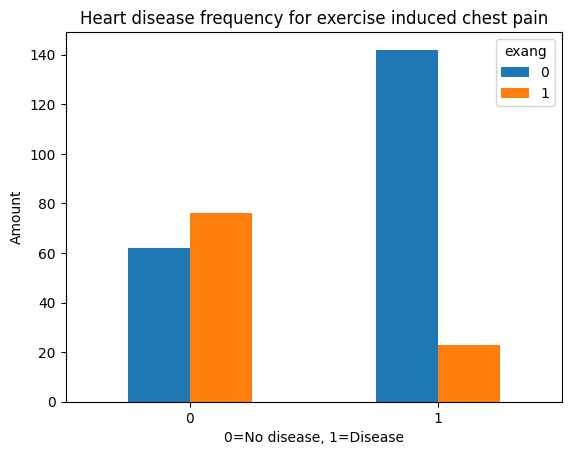

In [ ]:
pd.crosstab(data.target, data.exang).plot(kind='bar')
plt.title('Heart disease frequency for exercise induced chest pain')
plt.xlabel('0=No disease, 1=Disease')
plt.ylabel('Amount')
# plt.legend(['No Pain', 'Pain'])
plt.xticks(rotation=0);

Strangely more participants having no pain during exercise, have higher chance of heart disease.

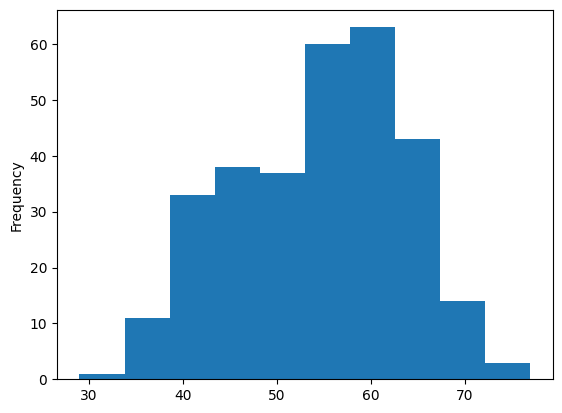

In [ ]:
data.age.plot(kind='hist');

No outliers

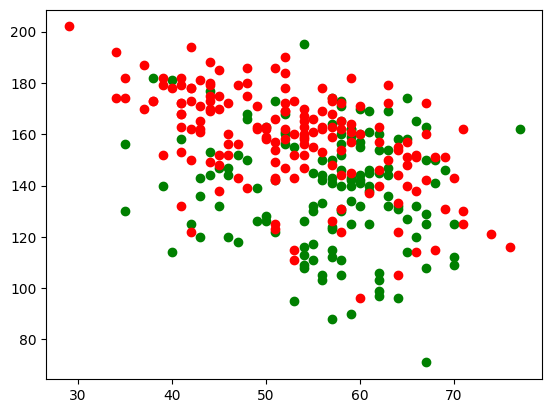

In [ ]:
plt.figure()
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0], color='green')
plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1], color='red')

General trend is the younger someone is, higher the heart rate. 
Can't really separate heart disaese vs no heart disease based on thalach and age. 

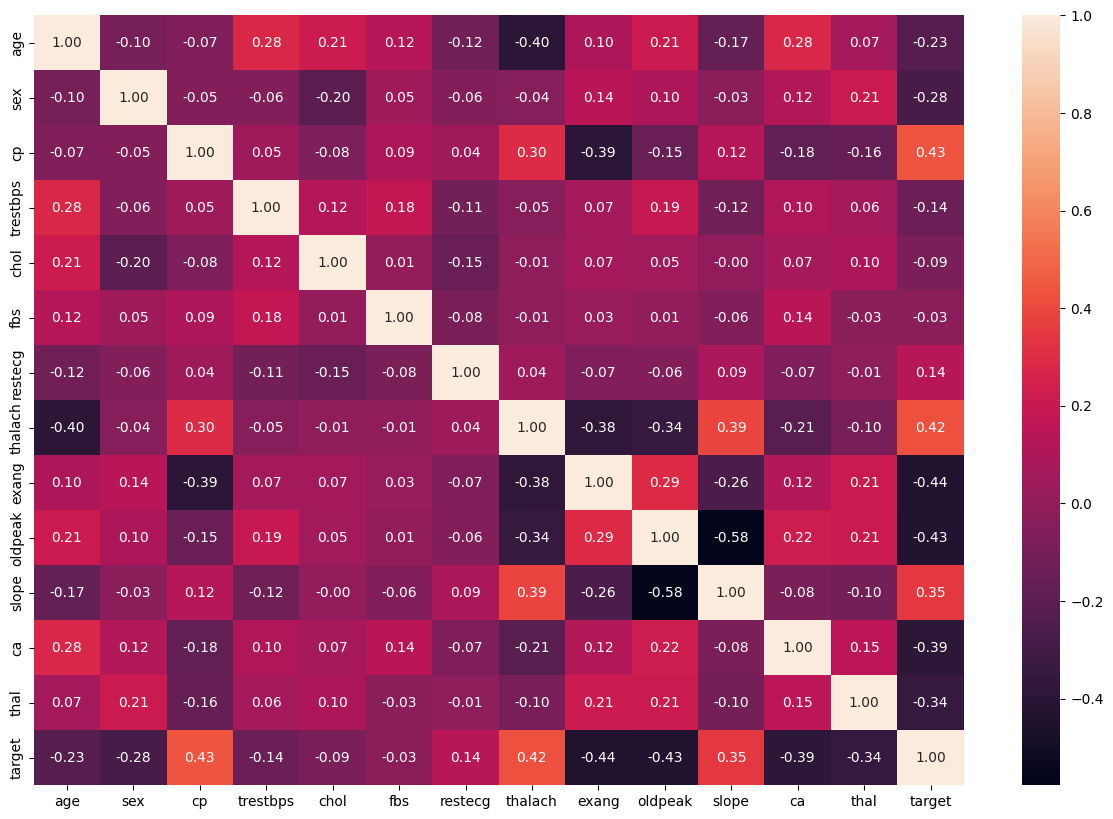

In [ ]:
corr_matrix = data.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f')

Negative correlation - one increases while other decreases - exang, oldpeak

Positive correlation - thalach, cp

## Data Modeling 

In [ ]:
X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [ ]:
len(X_train), len(X_test)

(242, 61)

In [ ]:
models = {"Linear SVC": LinearSVC(),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
    fits and evaluates ML models

    params:
    models (dict): dictionary of model and name
    X_train (np array): training set (no labels)
    X_test (np array): testing set  (no labels)
    y_train (np array): training set labels
    y_test (np array): testing set labels
  """
  results = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_test, y_test)

  return results

In [ ]:
res = fit_and_score(models, X_train, X_test, y_train, y_test)
res

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

In [ ]:
scores = pd.DataFrame(res, index=['accuracy'])
scores

,Linear SVC,Logistic Regression,KNN,Random Forest
accuracy,0.868852,0.885246,0.688525,0.852459


### Hyperparameter tuning, Feature importance and Evaluation

* confusion matrix
* f1 score
* precision
* recall
* classification report
* roc auc curve


In [ ]:
# Tuning KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Scores')

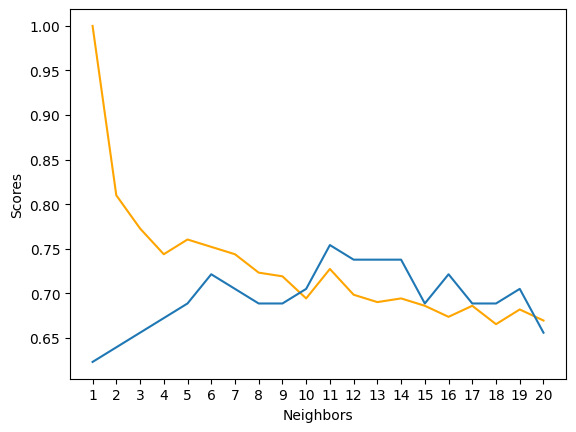

In [ ]:
plt.plot(neighbors, train_scores, color='orange', label='train scores')
plt.plot(neighbors, test_scores, label='test scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Neighbors')
plt.ylabel('Scores')

In [ ]:
max(test_scores)

0.7540983606557377

K of 11 gives best test accuracy. But still worse than other models without tuning

In [ ]:
log_reg_grid = {""}